In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift, ifft

### Windowing

0.08000000000000007
0.0894162270238526


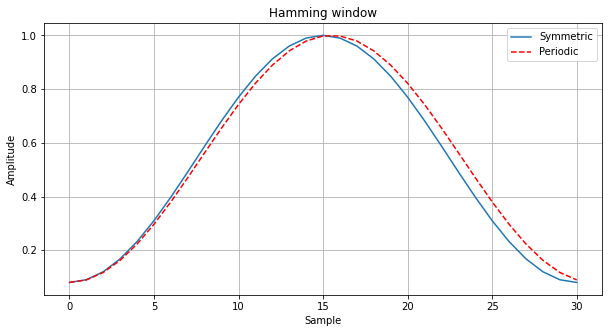

In [15]:
windowS = signal.hamming(31, sym=True) # symmetric window
windowP = signal.hamming(31, sym=False) # Periodic window

fig = plt.figure(figsize=(10,5))

plt.plot(windowS, label='Symmetric')
plt.plot(windowP, c='r', linestyle='dashed', label='Periodic')
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend()
plt.grid()

print(windowS[-1])
print(windowP[-1])

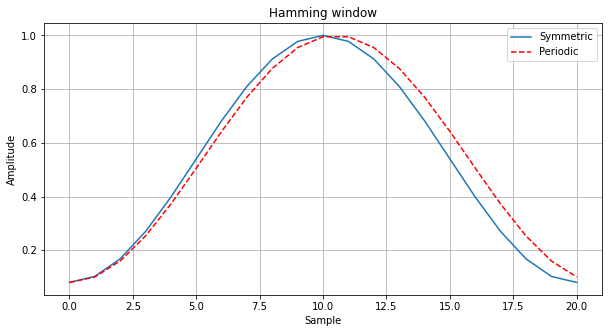

In [14]:
windowS = signal.hamming(21, sym=True) # symmetric window
windowP = signal.hamming(21, sym=False) # Periodic window

fig = plt.figure(figsize=(10,5))

plt.plot(windowS, label='Symmetric')
plt.plot(windowP, c='r', linestyle='dashed', label='Periodic')
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend()
plt.grid()

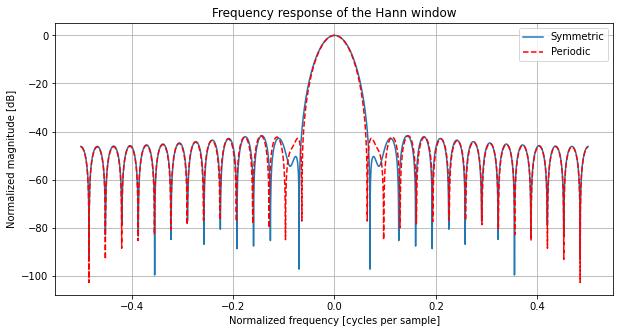

In [17]:
fig = plt.figure(figsize=(10,5))


A = fft(windowS, 2048) / (len(windowS)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, label='Symmetric')


A = fft(windowP, 2048) / (len(windowP)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response, c='r', linestyle='dashed', label='Periodic')

plt.title("Frequency response of the Hann window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend()
plt.grid()

### Discrete Cosine Transform

DCT helps to encode the signal into a format that is easy to compress. <br>
DCT is loseless and reversible.

In [ ]:
import IPython.display as ipd

In [ ]:
x, sr = librosa.load('audio/radio-favorite-station.wav', sr=44100)
print('Array dimensions {}'.format(x.shape))
print('Frequency {} Hz'.format(sr))
ipd.Audio(x, rate=sr)

In [ ]:
plt.figure(figsize=(15, 5))
t = np.linspace(0, int(len(x)/sr), len(x))
plt.plot(t,x)
plt.grid()
plt.tight_layout()
plt.xlabel('Time [s]', fontsize=16)

In [ ]:
xdct = scipy.fftpack.dct(x, axis=0, norm='ortho' )
xdct.shape

In [ ]:
# Threshold
thresh = 0.001
dct_thresh = xdct * (abs(xdct) > (thresh*np.max(xdct)))

In [ ]:
percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (x.shape[0]*1.0)
print('Keeping {}% of the DCT coefficients'.format(round(percent_nonzeros*100.0,2)))

In [ ]:
xidct = scipy.fftpack.idct( dct_thresh, axis=0 , norm='ortho')
xidct.shape

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(t,x, 'k', alpha=0.8)
plt.plot(t,xidct, 'r', label='DCT applied', alpha=0.3)
plt.grid()
plt.ylim(-1,1)
plt.tight_layout()
plt.xlabel('Time [s]', fontsize=16)
plt.title('Original vs compressed DCT',fontsize=20)
plt.legend()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(t,x-xidct, 'b', alpha=0.5)
plt.grid()
plt.tight_layout()
plt.xlabel('Time [s]', fontsize=16)
plt.ylim(-0.8, 0.8)
plt.title('Error', fontsize=20)

In [ ]:
ipd.Audio(xidct, rate=sr)

19


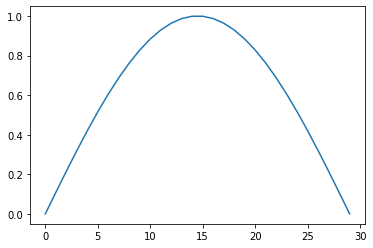

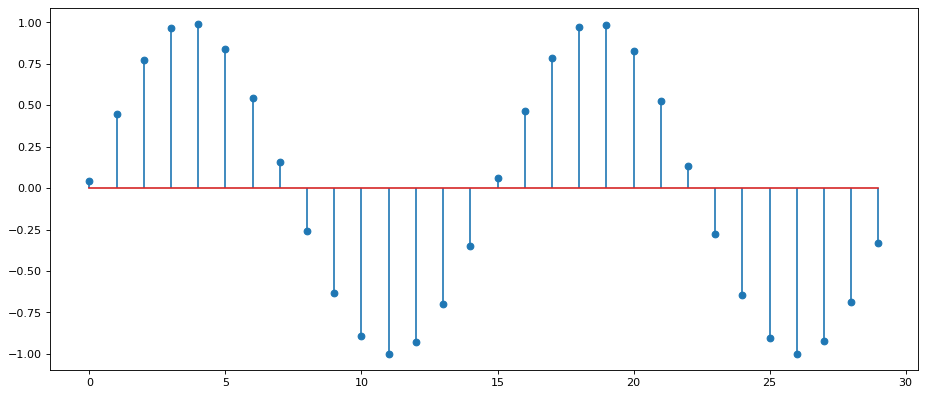

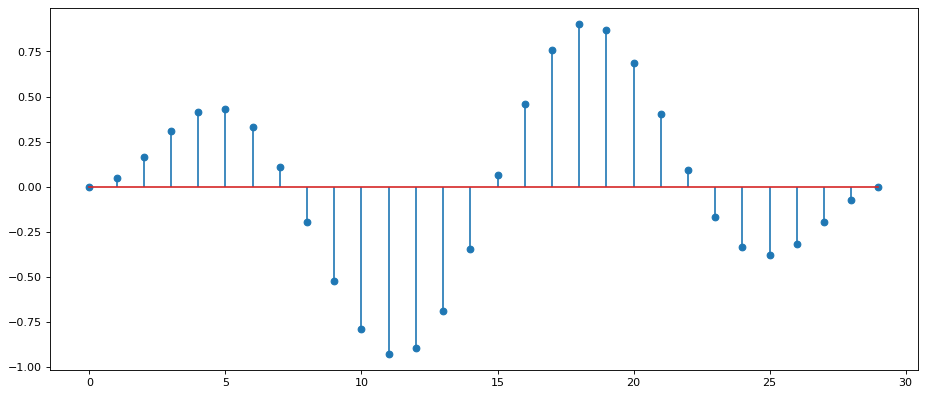

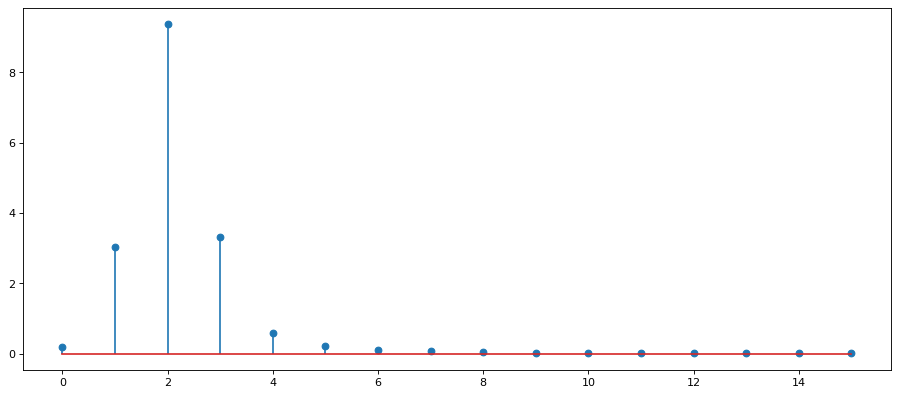

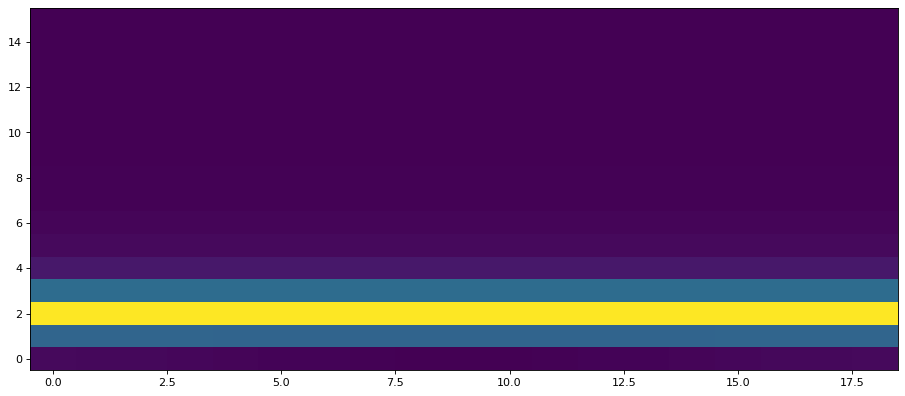

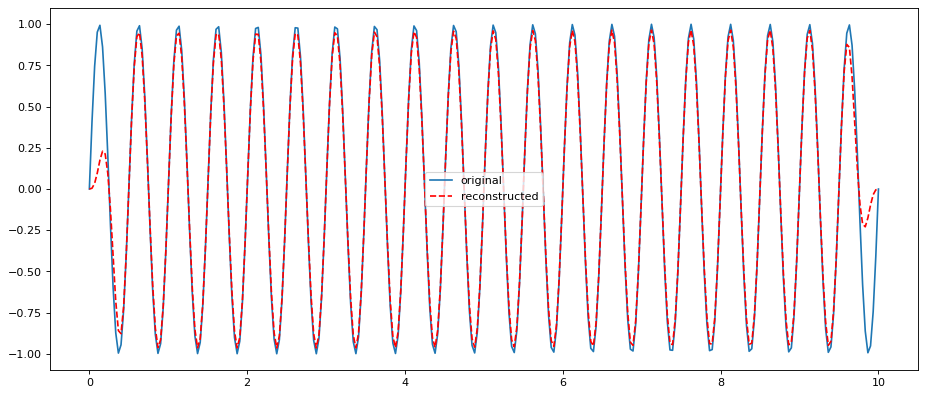